In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# mirae = pd.read_csv('/content/drive/MyDrive/mirae_data.csv')
df = pd.read_csv('/content/drive/MyDrive/미래에셋/전처리/data/jangdan_cluster.csv')

In [ ]:
mirae.tail()

,성별,연령,최초계좌개설일,고객등급_202105,주거래상품_202105,주거래매체_202105,국내주식자산_202105,해외주식자산_202105,상품자산_202105,보유종목수_202105,국내주식매수_202105,국내주식매도_202105,해외주식매수_202105,해외주식매도_202105,거래종목수_202105,m.Stock_접속일수_202105,m.Global_접속일수_202105,m.All_접속일수_202105,퇴직연금자산_202105,개인연금자산_202105,코스피거래비중_202105,코스닥거래비중_202105,선호시장_202105,손절횟수_202105,이익실현횟수_202105,DayTrading비중_202105,Swing비중_202105,Buy&Hold비중_202105,시총1천억미만선호도_202105,시총1천억이상3천억미만선호도_202105,시총3천억이상1조미만선호도_202105,시총1조이상선호도_202105,신용_202105,주식보유1위종목_202105,주식보유2위종목_202105,주식보유3위종목_202105,주식보유1위금액_202105,주식보유2위금액_202105,주식보유3위금액_202105,주식매수1위종목_202105,...,코스닥거래비중_202006,선호시장_202006,손절횟수_202006,이익실현횟수_202006,DayTrading비중_202006,Swing비중_202006,Buy&Hold비중_202006,시총1천억미만선호도_202006,시총1천억이상3천억미만선호도_202006,시총3천억이상1조미만선호도_202006,시총1조이상선호도_202006,신용_202006,주식보유1위종목_202006,주식보유2위종목_202006,주식보유3위종목_202006,주식보유1위금액_202006,주식보유2위금액_202006,주식보유3위금액_202006,주식매수1위종목_202006,주식매수2위종목_202006,주식매수3위종목_202006,주식매수1위금액_202006,주식매수2위금액_202006,주식매수3위금액_202006,주식매도1위종목_202006,주식매도2위종목_202006,주식매도3위종목_202006,주식매도1위금액_202006,주식매도2위금액_202006,주식매도3위금액_202006,Dr.Big의국내주식_202006,Dr.Big의해외주식_202006,Dr.Big의국내ETF_202006,Dr.Big의펀드연금_202006,Dr.Big의투자진단_202006,Dr.Big의시그널_202006,뉴스로종목포착_202006,해외ETF트렌드_202006,초고수의선택_202006,주간상품TOP10_202006
1499987,1.0,30대,201606.0,S,주식,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,8.0,92.0,코스닥,7.0,3.0,7.0,82.0,8.0,0.0,57.0,24.0,19.0,0.0,A082800,A048870,0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499988,1.0,40대,200705.0,H,주식,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0,0.0,72.0,28.0,코스피,16.0,21.0,10.0,85.0,3.0,19.0,68.0,11.0,2.0,0.0,A025550,A019770,A004540,0.0,0.0,0.0,A025550,...,28.0,코스피,9.0,12.0,18.0,78.0,4.0,55.0,39.0,6.0,0.0,0.0,A014990,A014990,A014990,0.0,0.0,0.0,A014990,0,0,0.0,0.0,0.0,A033340,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499989,1.0,50대,200001.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499990,1.0,60대이상,201311.0,R,퇴직연금,1,400000.0,0.0,0.0,2.0,190000.0,170000.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,70.0,30.0,코스피,0.0,6.0,0.0,91.0,8.0,0.0,1.0,24.0,75.0,0.0,A006400,A005930,A302440,230000.0,150000.0,11000.0,0,...,46.0,코스피,0.0,3.0,0.0,99.0,0.0,0.0,0.0,45.0,55.0,0.0,A078160,A006360,0,0.0,0.0,0.0,A078160,A078600,A006360,0.0,0.0,0.0,A078600,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499991,1.0,60대이상,200001.0,H,주식,1,9900000.0,0.0,30000.0,0.0,5800000.0,6900000.0,0.0,0.0,0.0,20.0,0.0,19.0,13000000.0,0.0,100.0,0.0,코스피,0.0,4.0,0.0,85.0,14.0,0.0,0.0,0.0,100.0,0.0,A036460,0,0,7400000.0,2000000.0,740000.0,0,...,0.0,코스피,0.0,2.0,0.0,82.0,17.0,0.0,0.0,0.0,100.0,0.0,A036460,A015760,0,2500000.0,640000.0,200000.0,A015760,0,0,540000.0,160000.0,140000.0,0,0,0,770000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
month_count = ['202105','202104','202103','202102','202101','202012','202011','202010','202009','202008','202007','202006']
mirae[['daytrading','swing','buy&hold']] = pd.DataFrame(data = np.array([[0,0,0]]*1499992), columns=['daytrading','swing','buy&hold'])
for i in month_count:
  mirae['daytrading'] = mirae['daytrading'] + mirae['DayTrading비중_'+i]
  mirae['swing'] = mirae['swing'] + mirae['Swing비중_'+i]
  mirae['buy&hold'] = mirae['buy&hold'] + mirae['Buy&Hold비중_'+i]
mirae[['daytrading','swing','buy&hold']] = np.around(mirae[['daytrading','swing','buy&hold']] / 12)
mirae['numb'] = 100/(mirae['daytrading']+mirae['swing']+mirae['buy&hold'])
mirae['daytrading'] = np.around(mirae['numb']*mirae['daytrading'])
mirae['swing'] = np.around(mirae['numb']*mirae['swing'])
mirae['buy&hold'] = np.around(mirae['numb']*mirae['buy&hold'])

In [ ]:
mirae.tail()

,daytrading,swing,buy&hold,numb
1499987,9.0,88.0,4.0,1.219512
1499988,19.0,78.0,3.0,1.020408
1499989,0.0,0.0,100.0,5.882353
1499990,3.0,93.0,4.0,1.020408
1499991,0.0,83.0,17.0,1.010101


In [ ]:
mirae.iloc[15]

daytrading    18.000000
swing         18.000000
buy&hold      65.000000
numb           5.882353
Name: 15, dtype: float64

In [ ]:
mirae.shape

(1499992, 699)

In [ ]:
from sklearn.cluster import KMeans

df = mirae[['daytrading','swing','buy&hold']]/100

# kmeans = KMeans(n_clusters=3)

# y = kmeans.fit_predict(df)

# df['Cluster'] = y
# df[['daytrading','swing','buy&hold']] = mirae[['daytrading','swing','buy&hold']]/100

# print(df.head())

# 결측치 제거하기

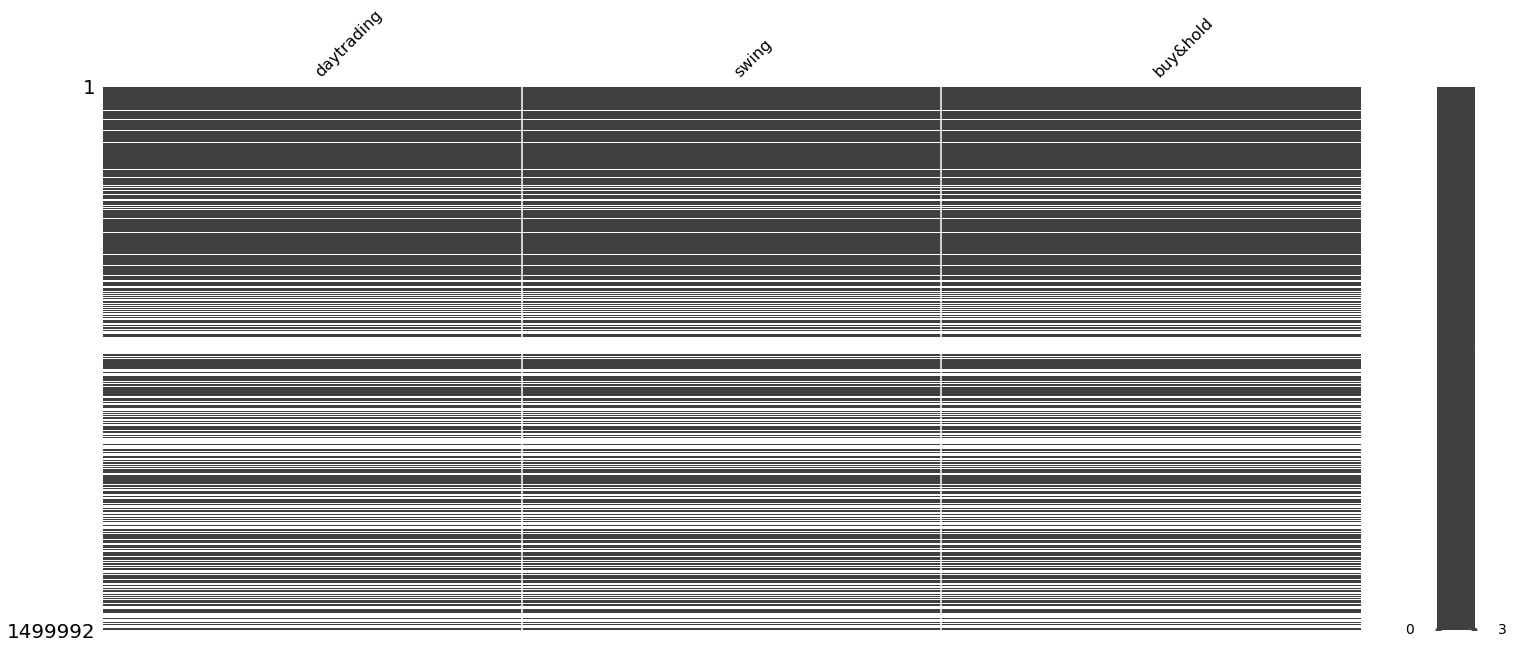

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df = df[df['daytrading'].isna() == False]

In [ ]:
df.isna().value_counts()

daytrading  swing  buy&hold
False       False  False       962923
dtype: int64

# ELBOW로 몇개의 클러스터로 나눌지 보기

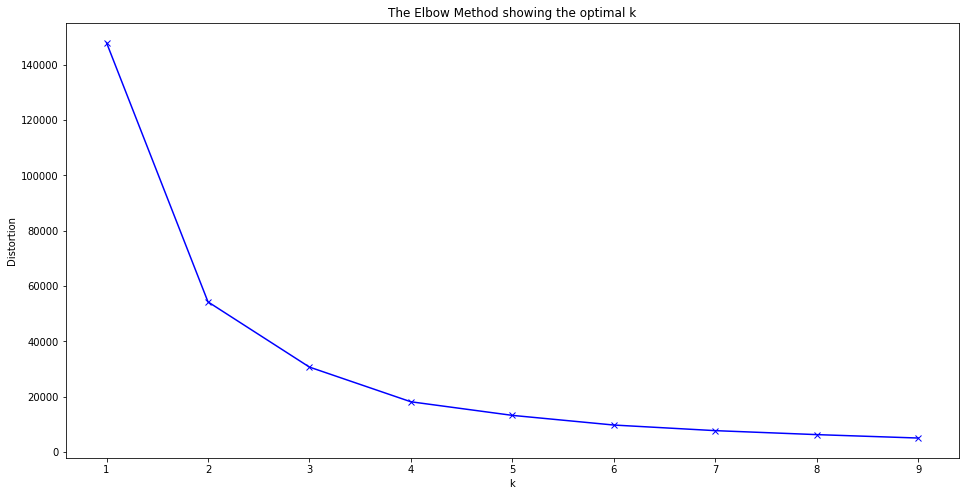

In [ ]:
import matplotlib.pyplot as plt
distortions = []
for k in range(1,10):
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(df)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#그래프를 통해 4번이 elbow인게 보여짐

# 정해진 클러스터대로 나누기

In [ ]:
kmeans = KMeans(n_clusters=4)

y = kmeans.fit_predict(df)

df['jangdan_cluster'] = y
df[['daytrading','swing','buy&hold']] = mirae[['daytrading','swing','buy&hold']]/100

print(df.head())

   daytrading  swing  buy&hold  Cluster
1        0.00   0.00      1.00        1
2        0.00   1.00      0.00        0
3        0.02   0.74      0.24        3
4        0.00   0.81      0.19        0
5        0.41   0.57      0.01        2


In [ ]:
df['jangdan_cluster'].value_counts()

0    632362
2    155719
3    102140
1     72702
Name: Cluster, dtype: int64

In [ ]:
df[df['jangdan_cluster'] == 2].iloc[:30]
#2는 초단기 인듯

,Unnamed: 0,daytrading,swing,buy&hold,jangdan_cluster
4,5,0.41,0.57,0.01,2
8,9,0.22,0.78,0.00,2
26,28,0.26,0.74,0.00,2
31,34,0.23,0.76,0.01,2
35,38,0.29,0.71,0.00,2
37,40,0.24,0.74,0.01,2
57,61,0.34,0.65,0.01,2
60,64,0.27,0.73,0.00,2
61,65,0.31,0.68,0.01,2
62,66,0.20,0.79,0.01,2


In [ ]:
df[df['jangdan_cluster'] == 1].iloc[:30]
#1은 장기

,Unnamed: 0,daytrading,swing,buy&hold,jangdan_cluster
0,1,0.00,0.00,1.00,1
5,6,0.00,0.00,1.00,1
6,7,0.00,0.26,0.74,1
14,15,0.18,0.18,0.65,1
15,16,0.00,0.00,1.00,1
17,18,0.05,0.22,0.73,1
105,110,0.00,0.00,1.00,1
153,163,0.00,0.32,0.68,1
231,247,0.00,0.00,1.00,1
234,250,0.00,0.15,0.85,1


In [ ]:
df[df['jangdan_cluster'] == 0].iloc[:30]
#중기

,Unnamed: 0,daytrading,swing,buy&hold,jangdan_cluster
1,2,0.00,1.00,0.00,0
3,4,0.00,0.81,0.19,0
7,8,0.04,0.90,0.06,0
9,10,0.00,0.86,0.14,0
10,11,0.00,0.94,0.06,0
12,13,0.18,0.82,0.00,0
13,14,0.00,1.00,0.00,0
16,17,0.00,1.00,0.00,0
18,19,0.01,0.97,0.02,0
19,20,0.00,0.97,0.03,0


In [ ]:
df[df['jangdan_cluster'] == 3].iloc[:30]
#중장기

,Unnamed: 0,daytrading,swing,buy&hold,jangdan_cluster
2,3,0.02,0.74,0.24,3
11,12,0.00,0.39,0.61,3
22,23,0.00,0.38,0.62,3
23,24,0.07,0.64,0.29,3
41,44,0.00,0.36,0.64,3
63,67,0.00,0.60,0.40,3
68,72,0.00,0.74,0.26,3
79,83,0.00,0.49,0.51,3
83,87,0.00,0.73,0.27,3
88,92,0.02,0.75,0.23,3
